<a href="https://colab.research.google.com/github/Natalia9922/Weather-conditions/blob/main/Project_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import io
from google.colab import files
import seaborn as sns

### Weather conditions affect the evaluation of visibility.

# Loading Dataset

In [ ]:
uploaded = files.upload()

Saving weatherHistory.csv to weatherHistory (3).csv


In [ ]:
#defining a data frame
df = pd.read_csv(io.BytesIO(uploaded['weatherHistory.csv']),index_col=False)

# Exploratory Data Analysis (EDA)

In [ ]:
#return the first 5 rows
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
df.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [ ]:
df.shape

(96453, 12)

In [ ]:
df.size

1157436

In [ ]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
#Generate descriptive statistics
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


array([[<Axes: title={'center': 'Temperature (C)'}>,
        <Axes: title={'center': 'Apparent Temperature (C)'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Wind Speed (km/h)'}>,
        <Axes: title={'center': 'Wind Bearing (degrees)'}>,
        <Axes: title={'center': 'Visibility (km)'}>],
       [<Axes: title={'center': 'Loud Cover'}>,
        <Axes: title={'center': 'Pressure (millibars)'}>, <Axes: >]],
      dtype=object)

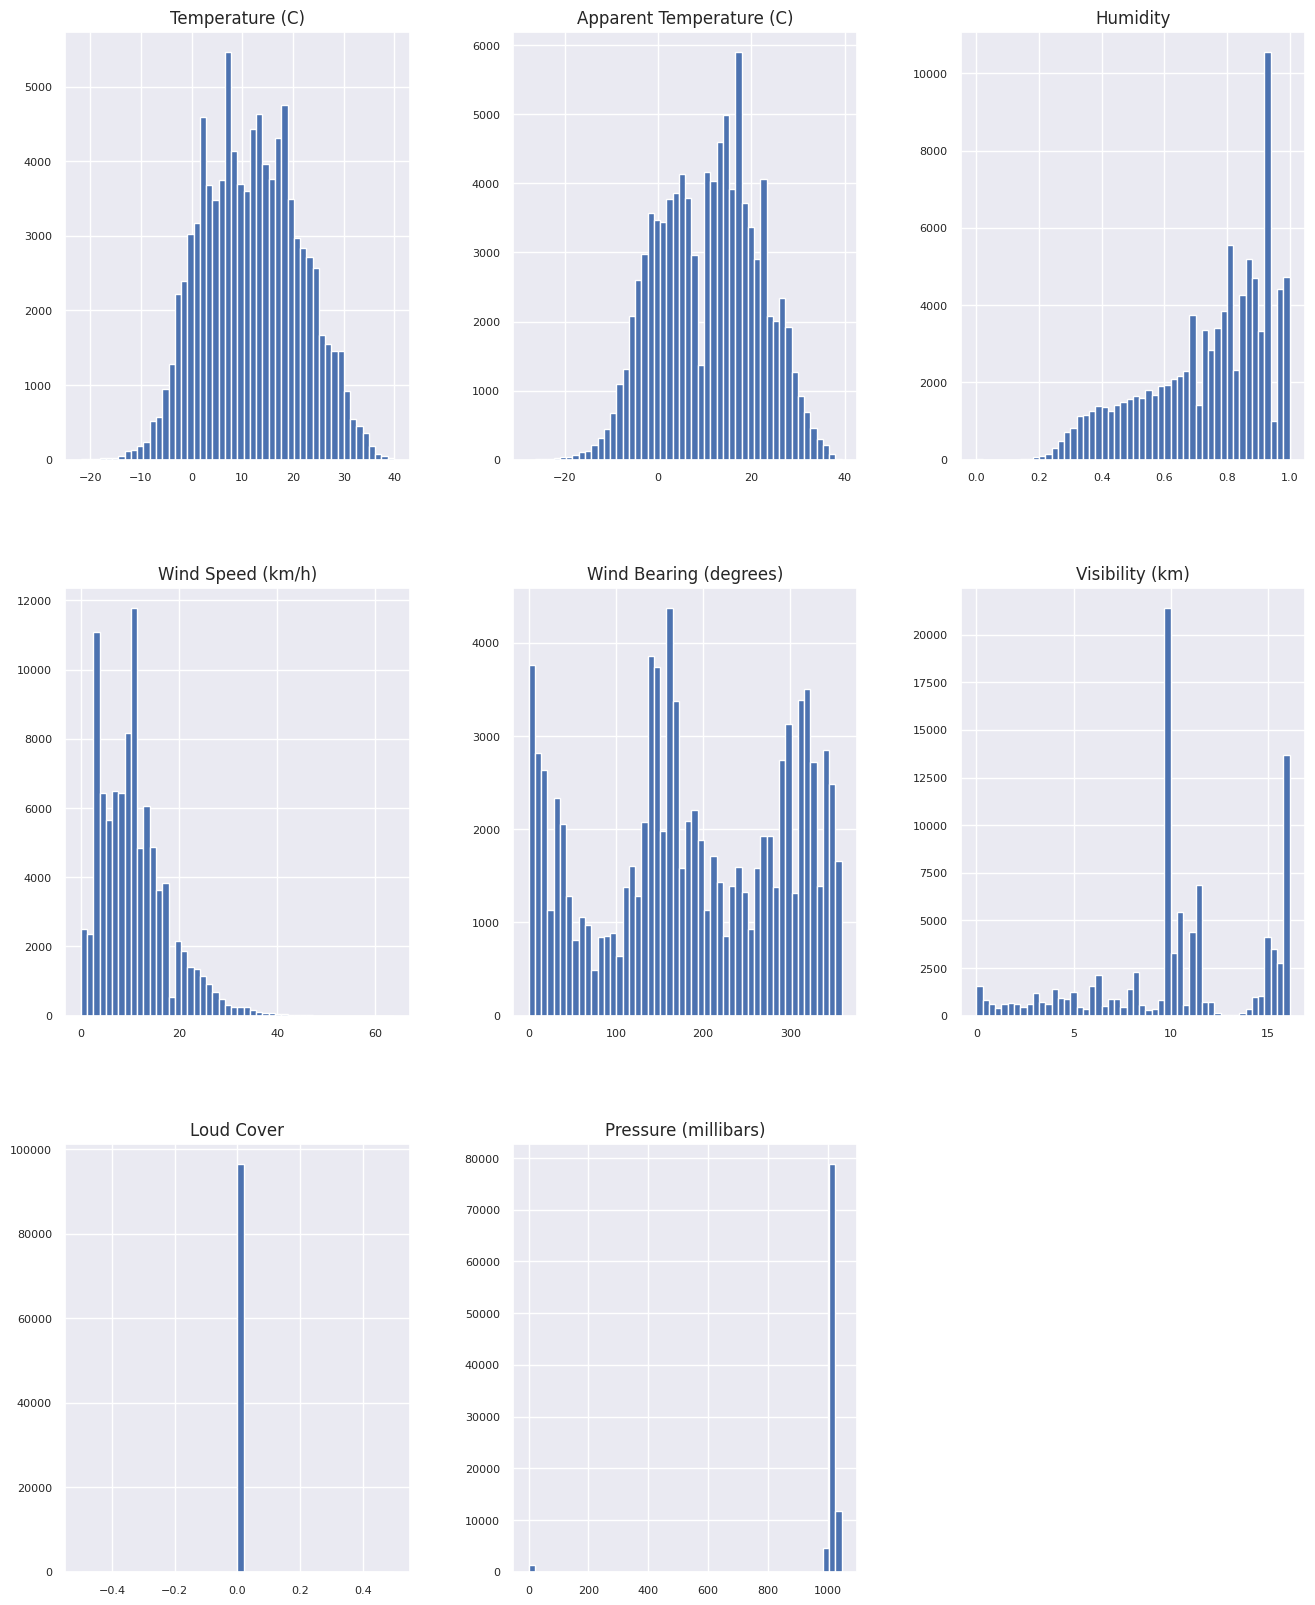

In [ ]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

<ipython-input-97-f28ad7987763>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pressure (millibars)'])


<Axes: xlabel='Pressure (millibars)', ylabel='Density'>

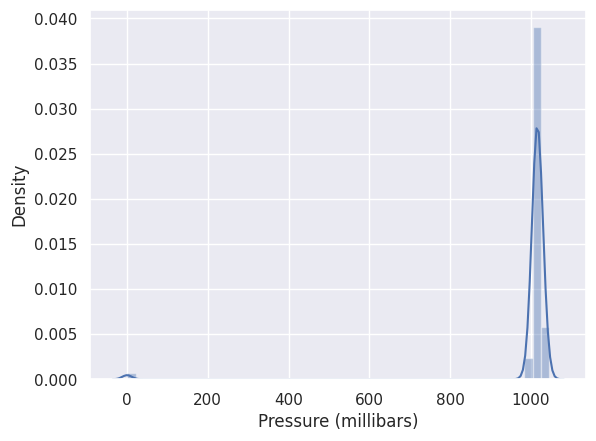

In [ ]:
sns.distplot(df['Pressure (millibars)'])

Observation: Loud Cover column contains 0 itself, Pressure column has incorrect values 0

In [ ]:
#checking missing values
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
#duplicate checking
df.duplicated().sum()

24

In [ ]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


# Basic Data Cleaning

In [ ]:
#remove duplicates
df.drop_duplicates(keep="first", inplace=True)

In [ ]:
df_length = len(df)
df_length #before 96453

96429

In [ ]:
#Removing unnecessary column; Loud Cover all contains 0
df.drop(['Loud Cover'],axis = 1,inplace = True)

In [ ]:
#removing missing values
df.dropna(inplace=True)

In [ ]:
#removing incorrect pressure values 0
df = df.loc[df['Pressure (millibars)'] != 0]

In [ ]:
#Removing unnecessary column; Daily Summary
df.drop(['Daily Summary'],axis = 1,inplace = True)

<ipython-input-106-6b77131fe608>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Daily Summary'],axis = 1,inplace = True)


# Data Visualization

Categorical columns in one list

In [ ]:
cat = ['Summary','Precip Type']

print('No. of categorical columns are:',len(cat))

No. of categorical columns are: 3


Numerical columns in one list

In [ ]:
num = []
for i in df.columns:
    if i not in cat:
        num.append(i)
print('No. of numerical/float columns are:',len(num))

No. of numerical/float columns are: 8


Exploring Categorical Columns/Features

In [ ]:
#Checking the number of unique values for each text column
df['Summary'].value_counts()

Partly Cloudy                          31506
Mostly Cloudy                          27780
Overcast                               16361
Clear                                  10018
Foggy                                   7019
Breezy and Overcast                      525
Breezy and Mostly Cloudy                 511
Breezy and Partly Cloudy                 379
Dry and Partly Cloudy                     86
Light Rain                                63
Windy and Partly Cloudy                   63
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   34
Dry                                       34
Breezy                                    30
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Humid and Overcast                         7
Windy and 

In [ ]:
#describing less significant variables as other
allowed_vals = ['Partly Cloudy',
                'Mostly Cloudy',
                'Overcast',
                'Clear',
                'Foggy',
                'Breezy and Overcast',
                'Breezy and Mostly Cloudy',
                'Breezy and Partly Cloudy'
                ]

df.loc[~df["Summary"].isin(allowed_vals), "Summary"] = "Other"
df.Summary.value_counts()

Partly Cloudy               31506
Mostly Cloudy               27780
Overcast                    16361
Clear                       10018
Foggy                        7019
Breezy and Overcast           525
Other                         525
Breezy and Mostly Cloudy      511
Breezy and Partly Cloudy      379
Name: Summary, dtype: int64

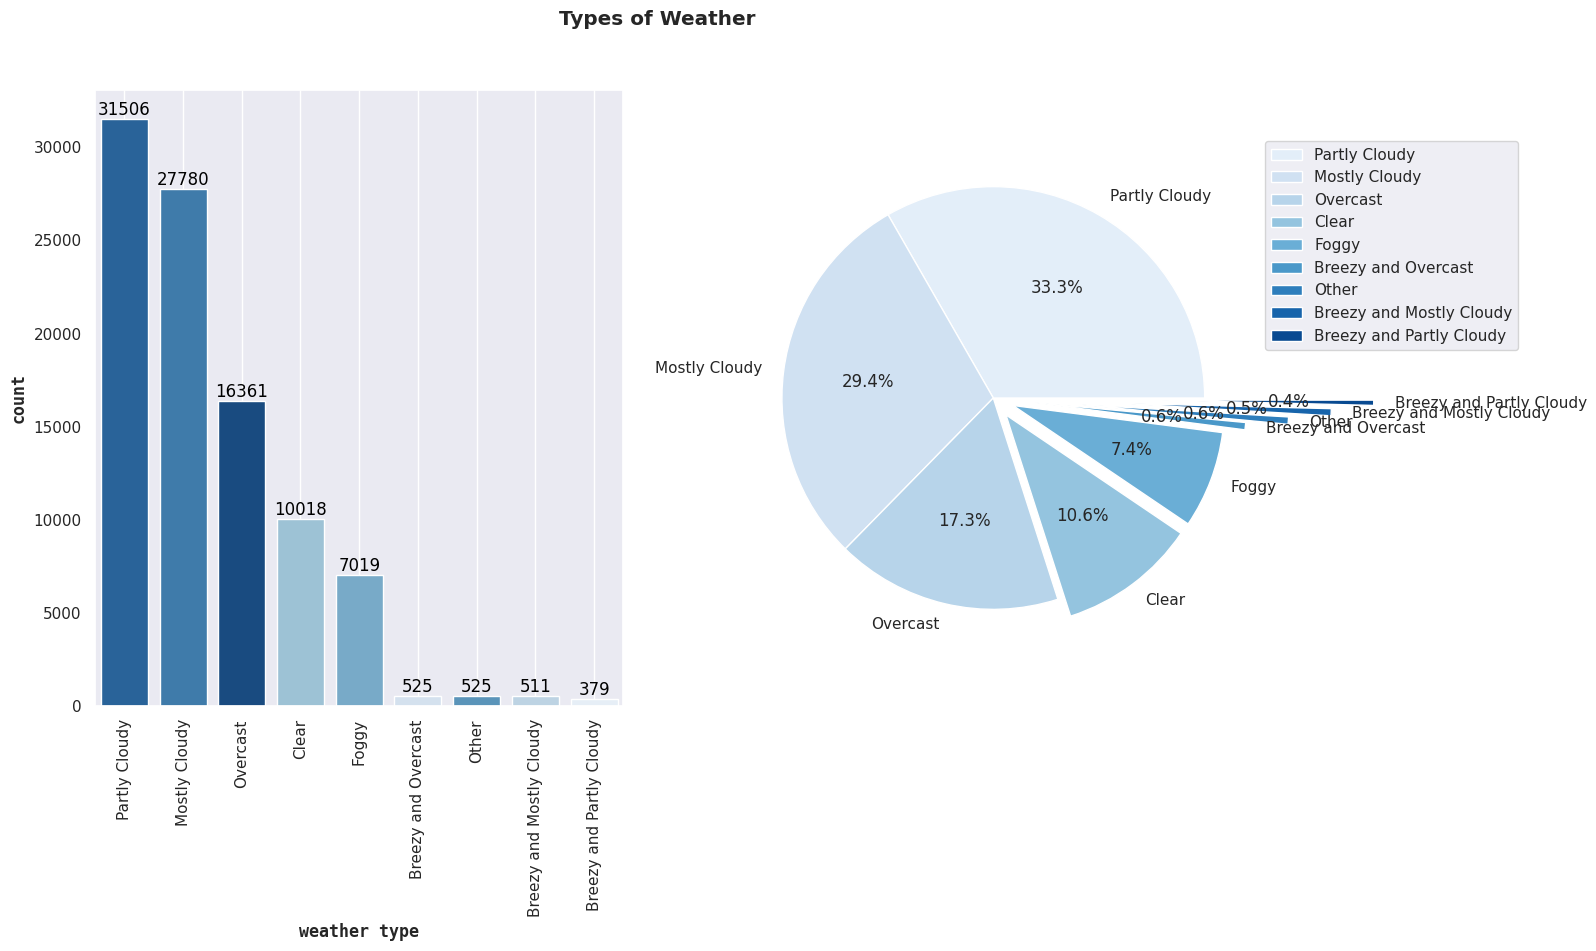

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['Summary'].value_counts().index
y=df['Summary'].value_counts().values.tolist()
data = df.groupby("Summary").size()

sns.set(style="dark", color_codes=True)
pal = sns.color_palette("Blues", len(data))
rank = data.argsort().argsort()

#Create a barplot
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
#Assign values to bars
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

ax[0].set_xlabel('weather type',weight='semibold', fontname = 'monospace')
ax[0].set_ylabel('count',weight='semibold', fontname = 'monospace')
ax[0].xaxis.set_tick_params(rotation=90)
ax[0].grid()

#Create a pie chart, _, _,
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0,0,0,0.1,0.1,0.2, 0.4, 0.6, 0.8])


plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of Weather',weight = 'bold')
plt.show()


In [ ]:
df['Precip Type'].value_counts()

rain    84092
snow    10532
Name: Precip Type, dtype: int64

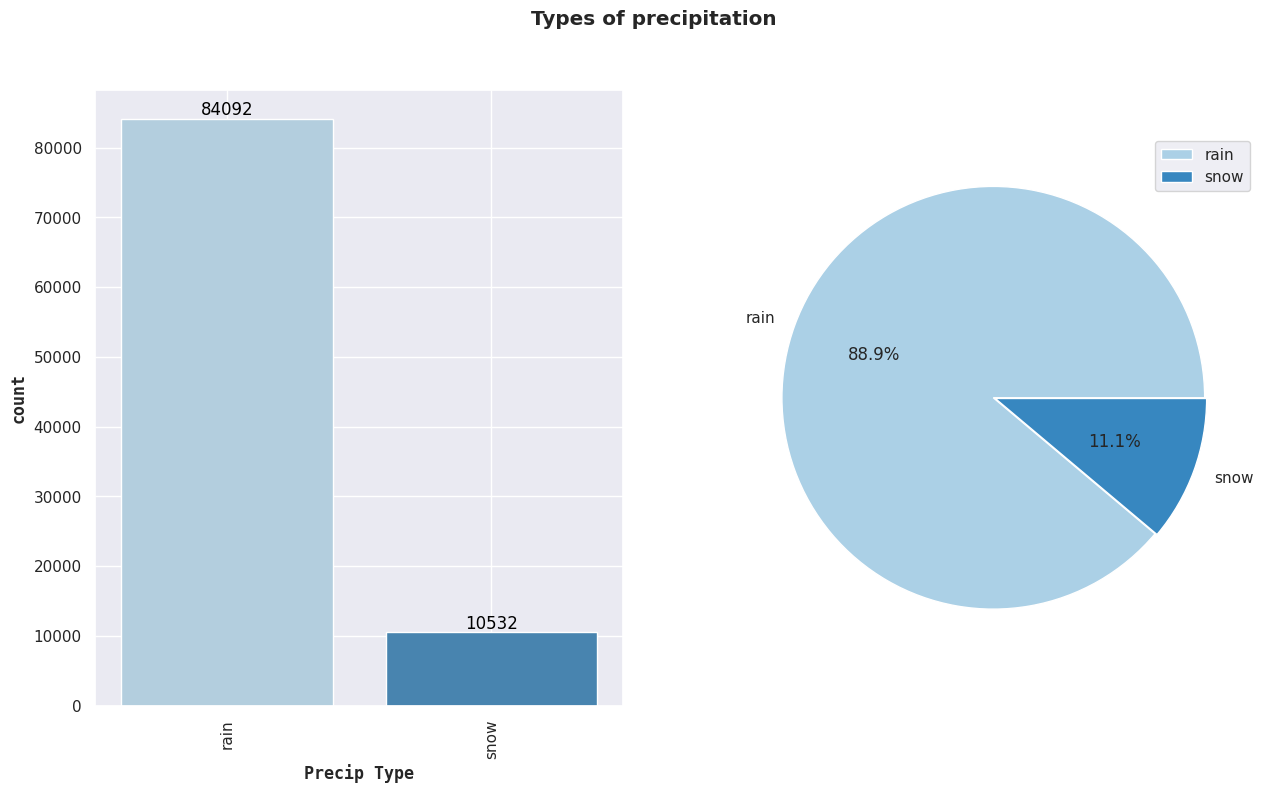

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['Precip Type'].value_counts().index
y=df['Precip Type'].value_counts().values.tolist()
data = df.groupby("Precip Type").size()

sns.set(style="dark", color_codes=True)
pal = sns.color_palette("Blues", len(data))
rank = data.argsort().argsort()

#Create a barplot
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
#Assign values to bars
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

ax[0].set_xlabel('Precip Type',weight='semibold', fontname = 'monospace')
ax[0].set_ylabel('count',weight='semibold', fontname = 'monospace')
ax[0].xaxis.set_tick_params(rotation=90)
ax[0].grid()

#Create a pie chart, _, _,
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0,.01])


plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of precipitation ',weight = 'bold')
plt.show()

Text(0.5, 1.0, 'Dependence of visibility on weather conditions')

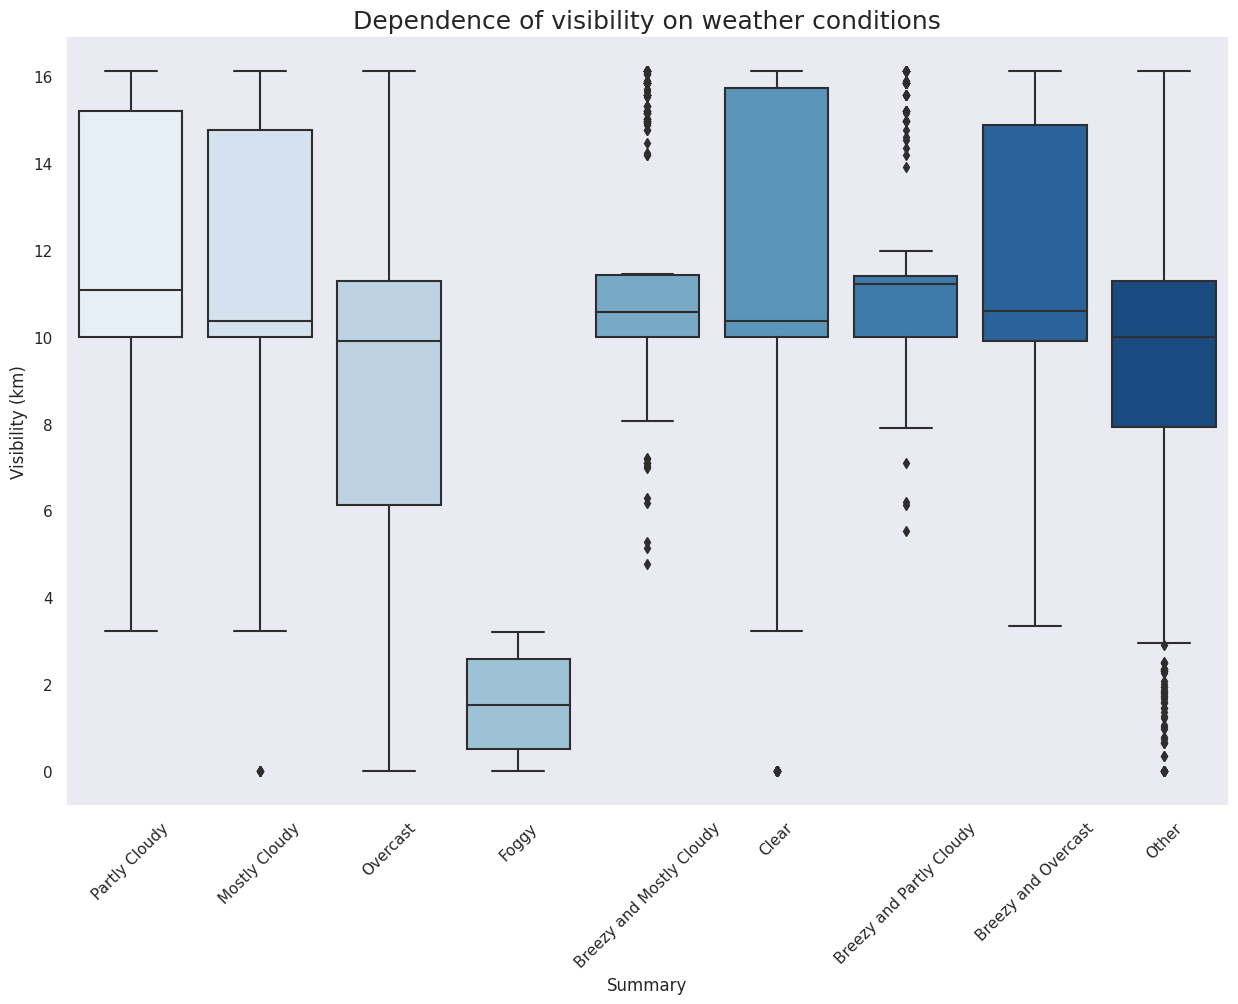

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))

sns.set_style('darkgrid')
sns.boxplot(x='Summary',y='Visibility (km)',data=df, palette ="Blues")
ax.xaxis.set_tick_params(rotation=45)
plt.title('Dependence of visibility on weather conditions', fontsize = "18")

Observation: variable clear contains outliers, incorrect values 0

In [ ]:
#providing variable clear outliers
Clear_outliers = df.loc[(df.Summary == 'Clear') & (df["Visibility (km)"] == 0)]
Clear_outliers

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
14120,2007-03-19 08:00:00.000 +0100,Clear,rain,10.555556,10.555556,0.63,3.2200,110.0,0.0,996.60
14123,2007-03-19 11:00:00.000 +0100,Clear,rain,15.000000,15.000000,0.46,11.2700,150.0,0.0,994.70
26352,2009-04-10 00:00:00.000 +0200,Clear,rain,10.555556,10.555556,0.66,3.2200,320.0,0.0,1017.20
26664,2009-04-22 00:00:00.000 +0200,Clear,rain,13.333333,13.333333,0.47,14.4900,30.0,0.0,1015.00
26665,2009-04-22 01:00:00.000 +0200,Clear,rain,12.222222,12.222222,0.50,11.2700,40.0,0.0,1015.70
27938,2009-12-15 02:00:00.000 +0100,Clear,snow,-2.222222,-7.644444,0.72,17.7100,20.0,0.0,1017.70
28199,2009-12-24 23:00:00.000 +0100,Clear,rain,10.555556,10.555556,0.80,20.9300,140.0,0.0,1004.50
28322,2009-12-03 02:00:00.000 +0100,Clear,rain,3.333333,3.333333,0.92,3.2200,310.0,0.0,1015.90
28323,2009-12-03 03:00:00.000 +0100,Clear,rain,3.333333,0.405556,0.92,11.2700,320.0,0.0,1015.60
28439,2009-12-05 23:00:00.000 +0100,Clear,rain,3.333333,1.672222,0.92,6.4400,270.0,0.0,1020.40


Observation: Rain is not possible with a clear sky

In [ ]:
#removing invalid clear value
df = df.loc[~((df.Summary == 'Clear') & (df["Visibility (km)"] == 0))]


Text(0.5, 1.0, 'Dependence of visibility on weather conditions')

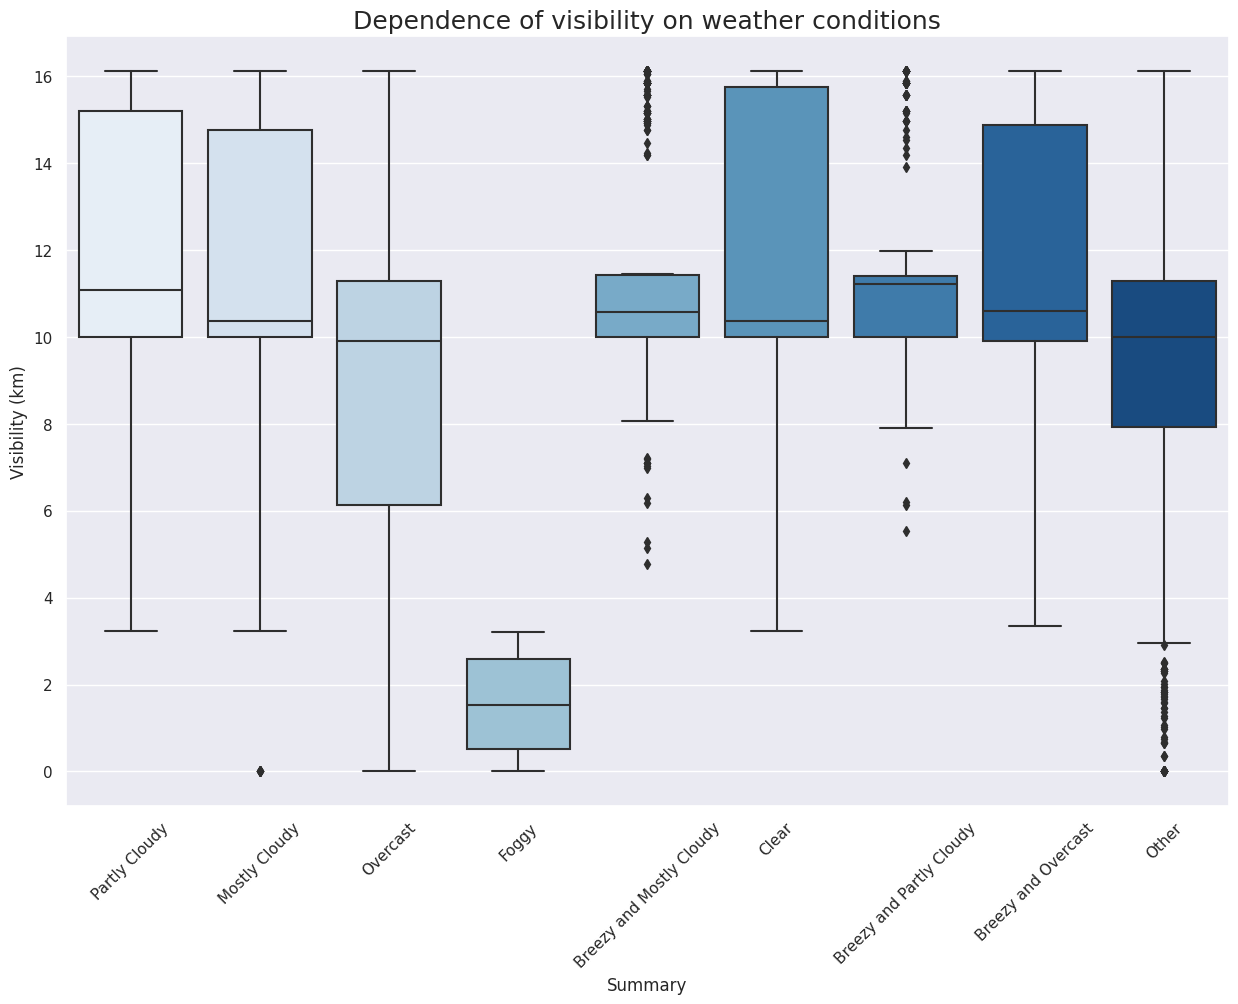

In [ ]:
#checking value
fig,ax=plt.subplots(figsize=(15,10))

sns.set_style('darkgrid')
sns.boxplot(x='Summary',y='Visibility (km)',data=df, palette ="Blues")
ax.xaxis.set_tick_params(rotation=45)
plt.title('Dependence of visibility on weather conditions', fontsize = "18")

Observation: Incorrect value clear was correctly removed

In [ ]:
sns.set(rc={"axes.facecolor":"#a1c45a" , "axes.grid" : False})
plt.figure(figsize=(11,9))
plt.gcf().text(.51, .84, "Box Plot", fontsize = 40, color='Black' ,ha='center', va='center')
sns.boxenplot(x=df['symboling'] , y = df['price'],palette="Set1")
plt.show()

Exploring Numerical/Float variables

Text(0.5, 1.0, 'Dependence of visibility on weather conditions')

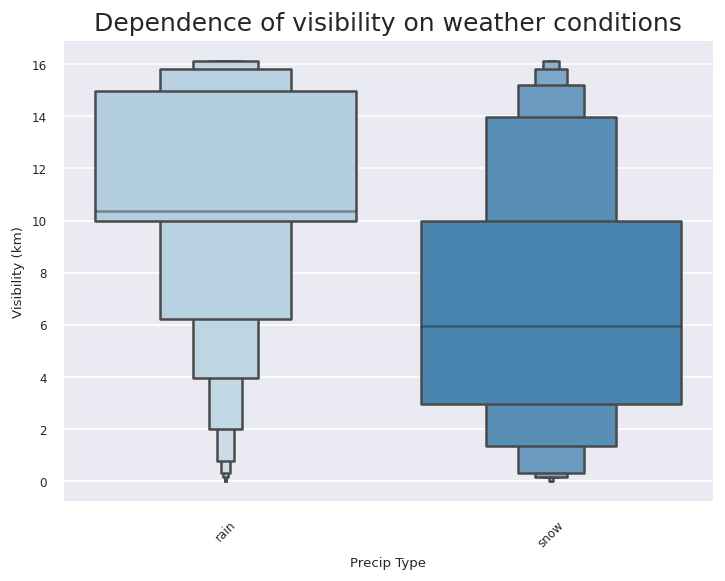

In [ ]:
fig,ax=plt.subplots(figsize=(7,5))

sns.set_style('darkgrid')
sns.boxenplot(x='Precip Type',y='Visibility (km)',data=df, palette ="Blues")
ax.xaxis.set_tick_params(rotation=45)
plt.title('Dependence of visibility on weather conditions', fontsize = "15")

Observation: Snow reduces visibility more than rain

# Data Preprocessing

In [ ]:
df = df[['Summary']['Precip Type']].join(df_cat)